### PyTorch中的卷积：
#### 卷积在PyTorch中有两种实现方式，一种是torch.nn.Conv2d()，一种是torch.nn.functional.conv2d()，这两种卷积形式本质上是一样的。
#### 卷积的输入数据类型：Variable
#### 输入数据的大小：(batch, channels, H, W)，其中batch表示输入的一批数据的数目；channels表示输入的通道，彩色图片是3，灰度图是1；H表示图片的高度；W表示图片的宽度。

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('./cat.png').convert('L')  # 读入一张灰度图
img = np.array(img, dtype=np.float32)

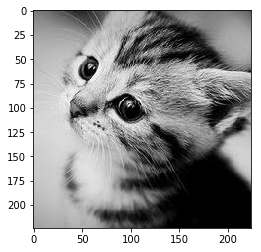

In [3]:
plt.imshow(img.astype('uint8'), cmap='gray')

In [4]:
# 将图片转换成tensor，并把图片改成卷积需要的大小
img = torch.from_numpy(img.reshape(1, 1, img.shape[0], img.shape[1]))
img.shape

torch.Size([1, 1, 224, 224])

In [5]:
# 定义一个算子进行轮廓检测
# nn.Conv2d的参数：[channels, output, h, w]，其中，channels是通道数，与输入图片的channels
# 一样；output是输出的深度，h表示过滤器的高度，w表示过滤器的宽度
# 卷积的输出：[batch, output, h_out, w_out]，其中batch是数据的数目，与输入的一样；output
# 表示输出的深度；h_out表示卷积结果的高度，w_out表示卷积结果的宽度。
# h_out = H - h + 1
# w_out = W - w + 1
conv = nn.Conv2d(1, 1, 3, bias=False)  # 定义卷积
sobel_kernel = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]],
                         dtype=np.float32)  # 轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3))  # 将卷积核的大小改为卷积需要的格式
# 给卷积核赋值
conv.weight.data = torch.from_numpy(sobel_kernel)
# 作用在图片上，得到边缘检测的结果
edge = conv(Variable(img))

In [6]:
edge.shape

torch.Size([1, 1, 222, 222])

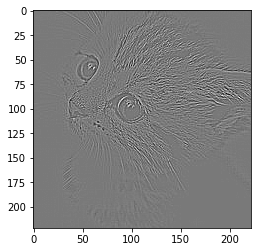

In [7]:
edge = edge.data.squeeze().numpy()  # 将维度为1的去掉
plt.imshow(edge, cmap='gray')

### 池化层
#### 卷积网络中另外一个非常重要的结构就是池化，这是利用了图片的下采样不变性，即一张图片变小了还是能够看出了这张图片的内容，而使用池化层能够将图片大小降低，非常好地提高了计算效率，同时池化层也没有参数。池化的方式有很多种，比如最大值池化，均值池化等等，在卷积网络中一般使用最大值池化。在PyTorch中，池化操作通常使用nn.MaxPool2d()，它的输入格式和卷积操作的一致。

(112, 112)


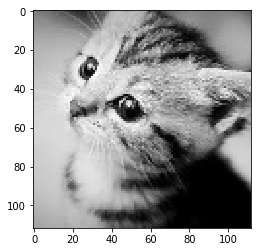

In [8]:
# nn.MaxPool2d(H, W)，其中H表示池化窗口的高，W表示池化窗口的宽
pool = nn.MaxPool2d(2, 2)
pool_img = pool(Variable(img))
pool_img = pool_img.data.squeeze().numpy()
print(pool_img.shape)
plt.imshow(pool_img, cmap='gray')

In [9]:
# 可以看到图片的大小变为了原来的一半，但是仍然能够看出图片的内容